In [1]:
from collections import defaultdict
import pandas as pd
import csv
import json
import sys
import re
import numpy as np
import matplotlib.pyplot as plt
import string
from operator import itemgetter
from dateutil import parser
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from wordcloud import WordCloud
from datetime import datetime

%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from collections import defaultdict
import statsmodels.api as sm
#from wordcloud import WordCloud
import jieba
import matplotlib
import gensim
from gensim import corpora, models, similarities
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #指定默认字体 
matplotlib.rc("savefig", dpi=400)
import jieba.analyse
import twitter_text
import collections

In [2]:
from collections import defaultdict
import twitter_text
import csv
import re
import sys
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()
    
from collections import defaultdict
import csv
 
data_dict = defaultdict(list) 
error_num = 0
line_num = 0 
total_num = 0
 
bigfile = open('/home/sysadmin/qinqiang/data/ows/ows_sample1.txt', 'rb')
chunkSize = 10000000
chunk = bigfile.readlines(chunkSize)
while chunk:
    total_num += len(chunk)
    lines = csv.reader((line.replace('\x00','') for line in chunk), delimiter=',', quotechar='"')
    for i in lines:
        line_num+=1
        if line_num%1000000==0:
            flushPrint(line_num)
        try:
            tweet=i[1]
            date=i[3]
            ex = twitter_text.Extractor(tweet)
            #at_names = ex.extract_mentioned_screen_names()
            #urls = ex.extract_urls()
            hashtag = ex.extract_hashtags()
            hashtags=[i.lower() for i in hashtag]
            for tag in hashtags: # error
                if len(date)==10:
                    data_dict[date].append(tag)
        except Exception, e:
            print e
            error_num+=1
            pass
    chunk = bigfile.readlines(chunkSize) 
print line_num, total_num,error_num

359 388 0


In [144]:
with open('/home/sysadmin/qinqiang/data/ows/date_append(hashtag).json','r') as f:
    data_dict=json.load(f)

In [145]:
data_dict=sorted(data_dict.iteritems(),key=lambda d:d[0])

In [72]:
# 将每一个dict value中tuple list中每一个tuple第二个元素合并成一个
for i in ds:
    print i,list(itertools.chain.from_iterable(list(itertools.chain(j[1] for j in ds[i][0]))))

2011-10-01 [u'ows', u'occupysf']
2011-11-06 [u'ows', u'occupysf', u'nypd', u'corporatefascism', u'occupywallstreet', u'ows', u'p2', u'occupywallst', u'ows', u'occupy', u'solidarity', u'ows', u'occupywallstreet', u'ows', u'occupyny', u'ows', u'ows', u'occupywallstreet', u'ows', u'ows', u'nypd', u'occupywallstreet', u'ows', u'p2', u'fed', u'ows', u'ows', u'ows', u'ows', u'ows', u'ows', u'ows', u'ows', u'ows', u'ows', u'occupywallstreet', u'ows', u'occupywallstreet', u'ows', u'p2', u'jonstewart', u'media', u'ows', u'blackout', u'truerwords', u'ows', u'p2', u'tlot', u'jonstewart', u'media', u'ows', u'blackout', u'truerwords', u'occupyamerica', u'ows', u'ows', u'occupysd', u'ows', u'occupywallstreet', u'ows', u'p2', u'ows', u'occupysf', u'occupywallstreet', u'99problems', u'ows', u'occupysf', u'ows', u'hannity', u'teaparty', u'ows', u'ows', u'occupywallstreet', u'ows', u'ows', u'ows', u'ows', u'ows', u'policebrutality', u'ows', u'humanrights', u'99percent', u'ows', u'ows', u'ows', u'p2', u'

In [146]:
daily_accumulated=defaultdict(list)
for i,j in enumerate(data_dict):
    date=data_dict[i][0]
    content=list(itertools.chain.from_iterable(list(itertools.chain(j[1] for j in data_dict[:i+1]))))
    daily_accumulated[date].append(set(content))

In [212]:
daily_accumulated_=[[i,len(daily_accumulated[i][0])] for i in daily_accumulated]
daily_accumulated_frame=pd.DataFrame(daily_accumulated_,columns=['date','num'])
daily_accumulated_frame.date=pd.to_datetime(daily_accumulated_frame.date)
daily_accumulated_frame=daily_accumulated_frame.sort(['date'],ascending=True)
daily_accumulated_frame[30:]

/home/sysadmin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,date,num
104,2011-11-05,75855
101,2011-11-06,77043
102,2011-11-07,78351
111,2011-11-08,79555
112,2011-11-09,80712
120,2011-11-10,82112
46,2011-11-11,83296
122,2011-11-12,84144
121,2011-11-13,84985
116,2011-11-14,86067


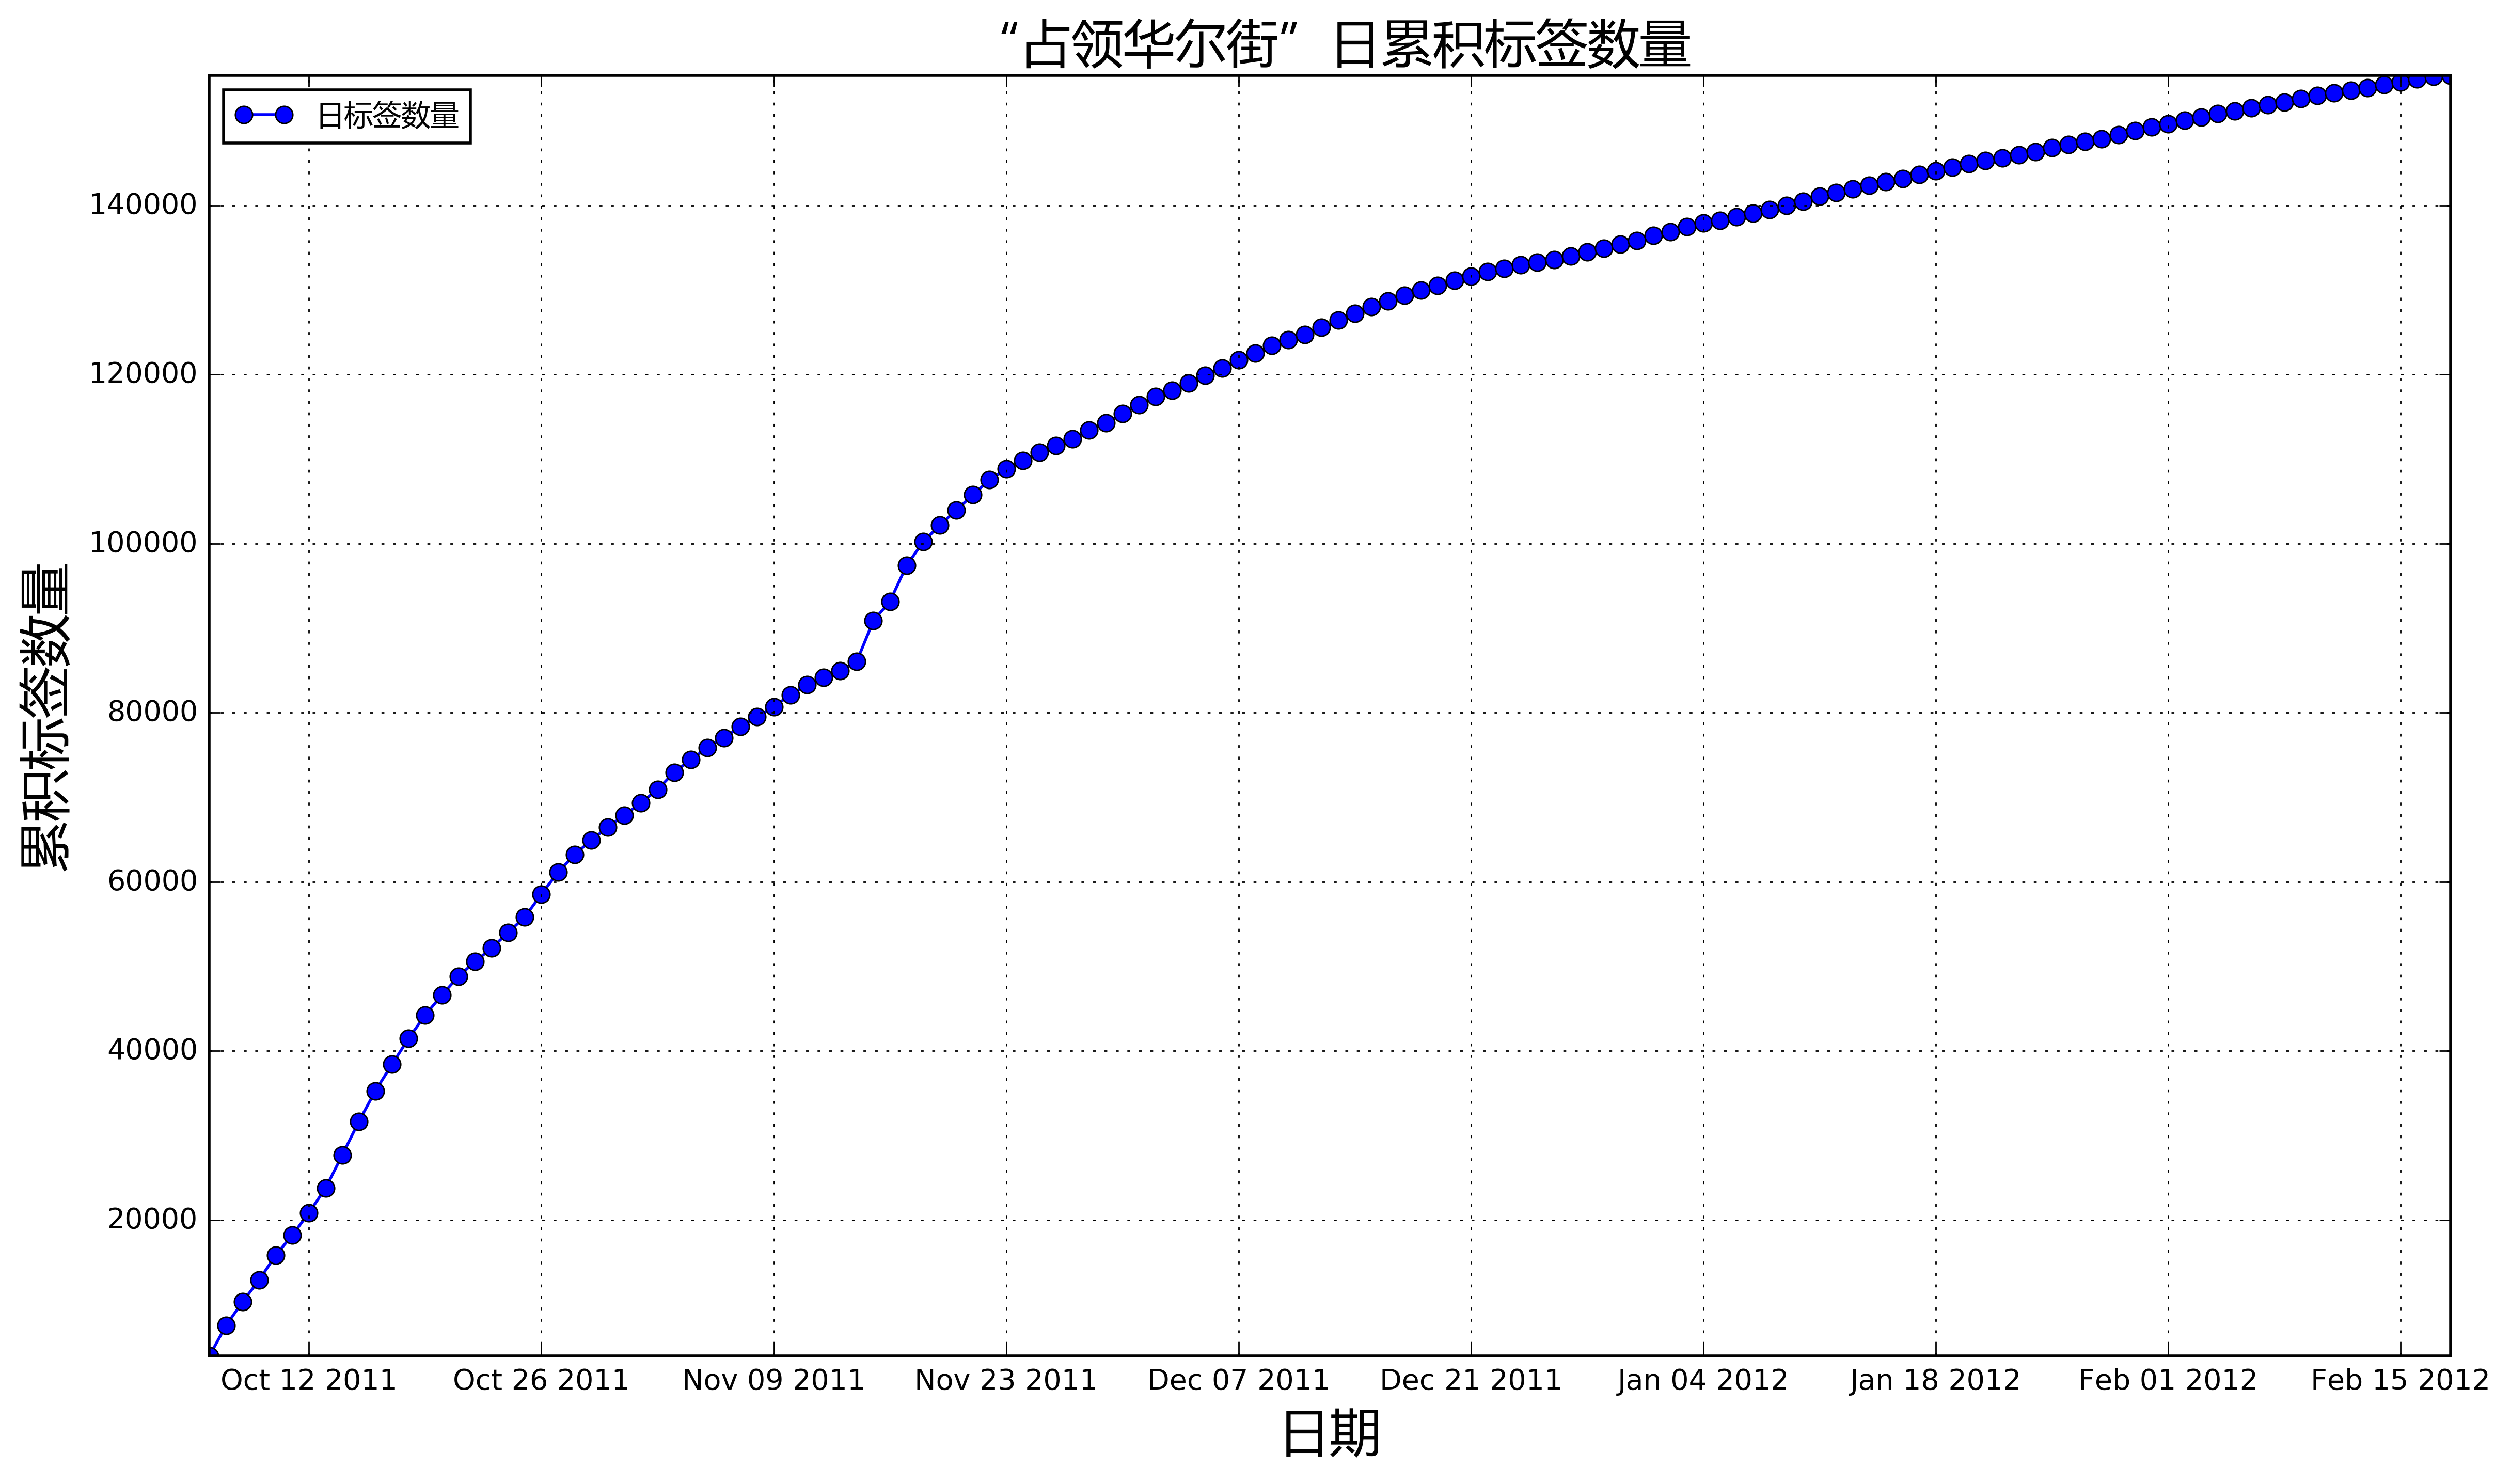

In [211]:
import matplotlib.pyplot as plt
import matplotlib
% matplotlib inline
import numpy as np
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
 
fig = plt.figure(figsize=(14, 8),facecolor='white')
font=FontProperties(fname=r"/home/sysadmin/qinqiang/msyh.ttf")
plt.plot(daily_accumulated_frame.date, daily_accumulated_frame.num, 'b-o',label=u"日标签数量")
#plt.label(u"每天累积hashtag数量",fontproperties=font,fontsize=18)
plt.legend(loc=2,prop=font,fontsize = 'xx-large')
plt.title(u'“占领华尔街”日累积标签数量',fontproperties=font,fontsize=18)
plt.xlabel(u'日期',fontproperties=font,fontsize=18)
plt.ylabel(u'累积标签数量',fontproperties=font,fontsize=18)
# plt.xticks( np.arange(len(daily_accumulated_frame.date)), daily_accumulated_frame.date, rotation=90 )
# plt.yscale('log')#,plt.xscale('log')
plt.axis('tight')
plt.grid(True)
plt.savefig('/home/sysadmin/qinqiang/ows_accumulated_hashtags.jpg',dpi=300)
plt.show()

In [5]:
bigfile = open('/home/sysadmin/qinqiang/data/ows/ows_sample1.txt', 'rb')
bigfiles=bigfile.readlines()

In [14]:
bigfiles[0:5]

['[\'"Twitter ID",Text,"Profile Image URL",Day,Hour,Minute,"Created At",Geo,"From User","From User ID",Language,"To User","To User ID",Source\\n\',\r\n',
 ' \'121813144174727168,"RT @AnonKitsu: ALERT!!!!!!!!!!COPS ARE KETTLING PROTESTERS IN PARK W HELICOPTERS AND PADDYWAGONS!!!! #OCCUPYWALLSTREET #OWS #OCCUPYNY PLEASE RT !!HELP!!!!",http://a2.twimg.com/profile_images/1539375713/Twitter_normal.jpg,2011-10-06,5,4,"2011-10-06 05:04:51",N;,Anonops_Cop,401240477,en,,0,"&lt;a href=&quot;http://twitter.com/&quot;&gt;web&lt;/a&gt;"\\n\',\r\n',
 ' \'121813146137657344,"@jamiekilstein @allisonkilkenny Interesting interview (never aired, wonder why??) by Fox with #ows protester http://t.co/Fte55Kh7",http://a2.twimg.com/profile_images/1574715503/Kate6_normal.jpg,2011-10-06,5,4,"2011-10-06 05:04:51",N;,KittyHybrid,34532053,en,jamiekilstein,2149053,"&lt;a href=&quot;http://twitter.com/&quot;&gt;web&lt;/a&gt;"\\n\',\r\n',
 ' \'121813150000619521,"@Seductivpancake Right! Those guys have a victory cond